### Target

![](http://r-statistics.co/screenshots/ggplot_masterlist_12.png)

In [1]:
import pandas as pd
mtcars= pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv") 
mtcars['mpg_z']= ((mtcars['mpg'] - mtcars['mpg'].mean()))/mtcars['mpg'].std()

In [2]:
mean_mpg_z = mtcars['mpg_z'].mean()
mean_mpg_z

6.678685382510707e-16

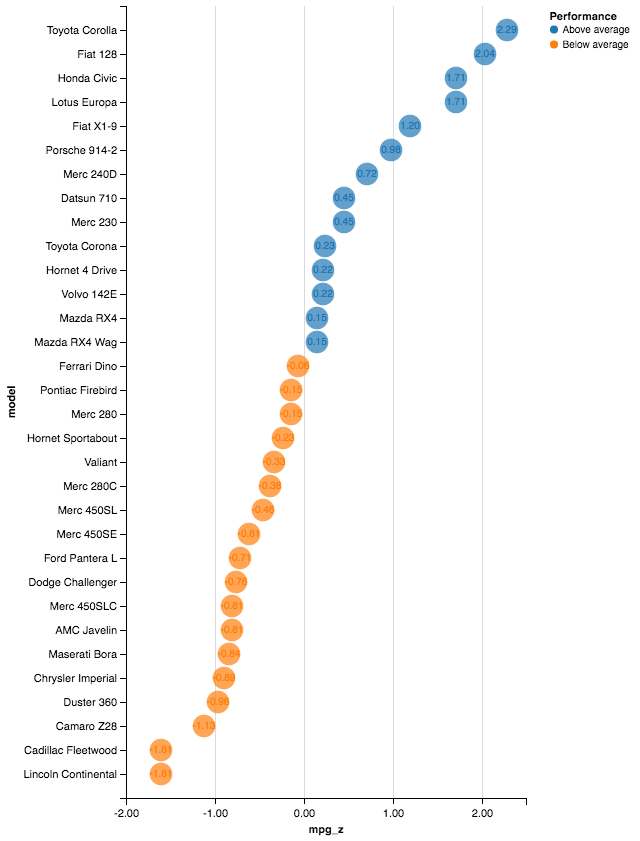

In [42]:
from altair import *
c1 = Chart(mtcars).mark_text(color='white').encode(y=Y('model', sort=SortField(op='mean', order='descending', field='mpg_z')),
                                x=X('mpg_z', ), text='mpg_z',
                              color= Color('Performance:N')).transform_data(
   calculate=[Formula('Performance', expr.where(expr.df.mpg_z < mean_mpg_z,'Below average','Above average'))],
   
).configure_cell(height=100, width=400).configure_scale(bandSize=24).configure(numberFormat="0.2f")

c2 = Chart(mtcars).mark_circle(size=400).encode(y=Y('model', sort=SortField(op='mean', order='descending', field='mpg_z')),
                                x=X('mpg_z', ), text='mpg_z',
                              color= Color('Performance:N')).transform_data(
   calculate=[Formula('Performance', expr.where(expr.df.mpg_z < mean_mpg_z,'Below average','Above average'))],
   
).configure_cell(height=100, width=400).configure_scale(bandSize=24).configure(numberFormat="0.2f")
c = c1+c2
c.data = mtcars
c